In [1]:
imatlab_export_fig('print-svg')  % Static svg figures.

In [2]:
doc control

In [3]:
doc ctrlmodels

In [4]:
help tf

 TF  Construct transfer function or convert to transfer function.
 
   Construction:
     SYS = TF(NUM,DEN) creates a continuous-time transfer function SYS with
     numerator NUM and denominator DEN. SYS is an object of type TF when
     NUM,DEN are numeric arrays, of type GENSS when NUM,DEN depend on tunable
     parameters (see REALP and GENMAT), and of type USS when NUM,DEN are
     uncertain (requires Robust Control Toolbox).
 
     SYS = TF(NUM,DEN,TS) creates a discrete-time transfer function with
     sample time TS (set TS=-1 if the sample time is undetermined).
 
     S = TF('s') specifies the transfer function H(s) = s (Laplace variable).
     Z = TF('z',TS) specifies H(z) = z with sample time TS.
     You can then specify transfer functions directly as expressions in S
     or Z, for example,
        s = tf('s');  H = exp(-s)*(s+1)/(s^2+3*s+1)
 
     SYS = TF creates an empty TF object.
     SYS = TF(M) specifies a static gain matrix M.
 
     You can set additional model p

In [5]:
H = tf([4, 0, -16],[1, 0, -0.25],-1)


H =


  4 z^2 - 16


  ----------


  z^2 - 0.25


Sample time: unspecified


Discrete-time transfer function.



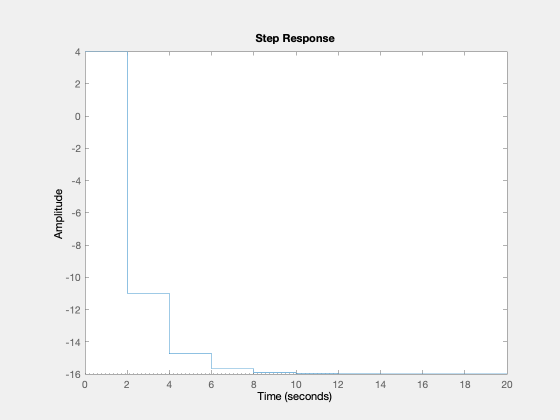

In [6]:
step(H)

In [7]:
ys = step(H)

ys =
    4.0000
    4.0000
  -11.0000
  -11.0000
  -14.7500
  -14.7500
  -15.6875
  -15.6875
  -15.9219
  -15.9219
  -15.9805
  -15.9805
  -15.9951
  -15.9951
  -15.9988
  -15.9988
  -15.9997
  -15.9997
  -15.9999
  -15.9999
  -16.0000


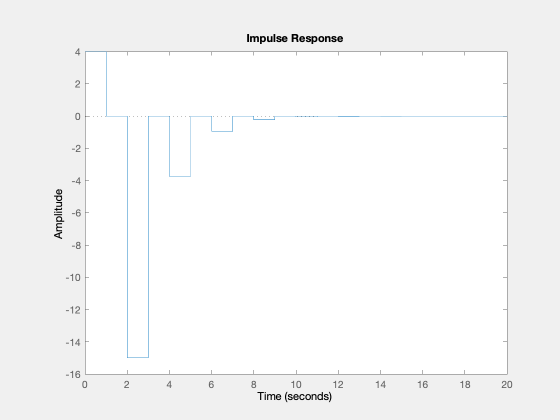

In [8]:
impulse(H)

In [9]:
yi = impulse(H)

yi =
    4.0000
         0
  -15.0000
         0
   -3.7500
         0
   -0.9375
         0
   -0.2344
         0
   -0.0586
         0
   -0.0146
         0
   -0.0037
         0
   -0.0009
         0
   -0.0002
         0
   -0.0001


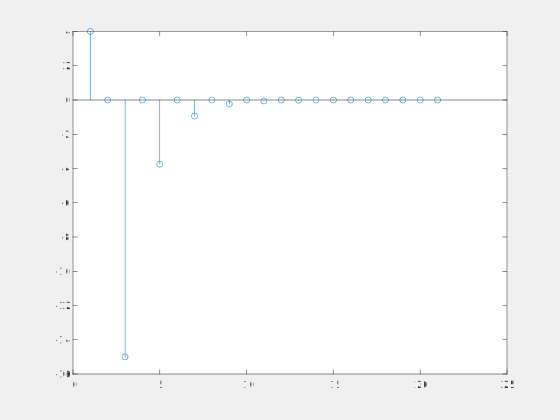

In [10]:
stem(yi)

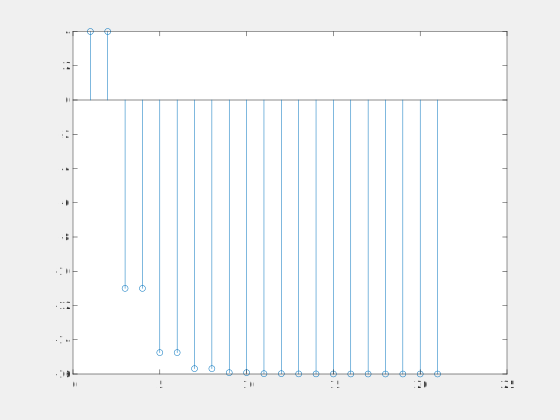

In [11]:
stem(ys)

In [12]:
help residue

 RESIDUE Partial-fraction expansion (residues).
    [R,P,K] = RESIDUE(B,A) finds the residues, poles and direct term of
    a partial fraction expansion of the ratio of two polynomials B(s)/A(s).
    If there are no multiple roots,
       B(s)       R(1)       R(2)             R(n)
       ----  =  -------- + -------- + ... + -------- + K(s)
       A(s)     s - P(1)   s - P(2)         s - P(n)
    Vectors B and A specify the coefficients of the numerator and
    denominator polynomials in descending powers of s.  The residues
    are returned in the column vector R, the pole locations in column
    vector P, and the direct terms in row vector K.  The number of
    poles is n = length(A)-1 = length(R) = length(P). The direct term
    coefficient vector is empty if length(B) < length(A), otherwise
    length(K) = length(B)-length(A)+1.
 
    If P(j) = ... = P(j+m-1) is a pole of multplicity m, then the
    expansion includes terms of the form
                 R(j)        R(j+1)           

In [13]:
[r,p,k] = residue([4,0,-16],[1,0,-0.25])

r =
   -15
    15


p =
    0.5000
   -0.5000


k =
     4


In [14]:
[r,p,k] = residue(conv([1, 0],[4,0,-16]),conv([1, -1],[1,0,-0.25]))

r =
  -16.0000
   15.0000
    5.0000


p =
    1.0000
    0.5000
   -0.5000


k =
     4


In [15]:
U = tf([1, 0], [1, -1], -1)
Y = series(U, H)


U =


    z


  -----


  z - 1


Sample time: unspecified


Discrete-time transfer function.




Y =


        4 z^3 - 16 z


  -------------------------


  z^3 - z^2 - 0.25 z + 0.25


Sample time: unspecified


Discrete-time transfer function.



In [16]:
[num,den] = tfdata(Y,'v')

num =
     4     0   -16     0


den =
    1.0000   -1.0000   -0.2500    0.2500


In [17]:
[r,p,k]=residue(num,den)

r =
  -16.0000
   15.0000
    5.0000


p =
    1.0000
    0.5000
   -0.5000


k =
     4


In [18]:
cd matlab
digiresp_model